# Artificial Intelligence

## CA5  First Phase

### Hamidreza Khodadadi 810197499

# Imported Libraries

In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read Files Data

In [2]:
TrainData = pd.read_csv("trainData.csv", header=None)
TestData = pd.read_csv("testData.csv", header=None)
TrainLabels = pd.read_csv("trainLabels.csv", header=None)
TestLabels = pd.read_csv("testLabels.csv", header=None)

# Review and Preprocessing

## Step 1:

0      0
1      0
2      0
3      0
4      0
      ..
779    0
780    0
781    0
782    0
783    0
Name: 1, Length: 784, dtype: int64


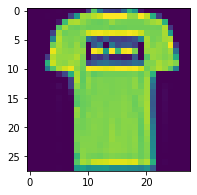

0      0
1      0
2      0
3      0
4      0
      ..
779    0
780    0
781    0
782    0
783    0
Name: 16, Length: 784, dtype: int64


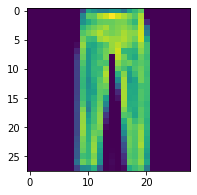

0        0
1        0
2        0
3        0
4        1
      ... 
779    167
780     73
781      0
782      0
783      0
Name: 5, Length: 784, dtype: int64


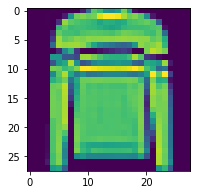

0      0
1      0
2      0
3      0
4      0
      ..
779    0
780    0
781    0
782    0
783    0
Name: 3, Length: 784, dtype: int64


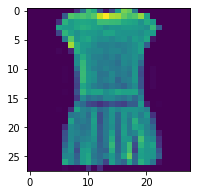

0      0
1      0
2      0
3      0
4      0
      ..
779    2
780    0
781    0
782    0
783    0
Name: 19, Length: 784, dtype: int64


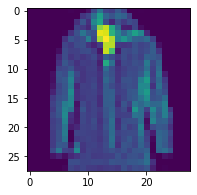

0      0
1      0
2      0
3      0
4      0
      ..
779    0
780    0
781    0
782    0
783    0
Name: 8, Length: 784, dtype: int64


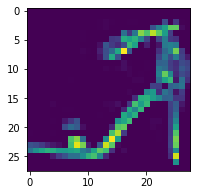

0        0
1        0
2        0
3        2
4        0
      ... 
779    160
780    100
781      0
782      0
783      0
Name: 18, Length: 784, dtype: int64


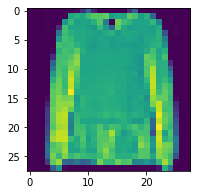

0      0
1      0
2      0
3      0
4      0
      ..
779    0
780    0
781    0
782    0
783    0
Name: 6, Length: 784, dtype: int64


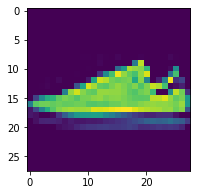

0      0
1      0
2      0
3      0
4      0
      ..
779    0
780    0
781    0
782    0
783    0
Name: 23, Length: 784, dtype: int64


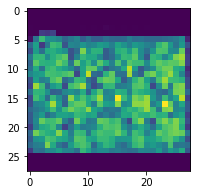

0      0
1      0
2      0
3      0
4      0
      ..
779    0
780    0
781    0
782    0
783    0
Name: 0, Length: 784, dtype: int64


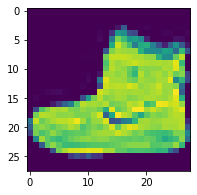

In [3]:
def show_classes_data(Data, DataLabels):    
    for i in range(10):
        plt.figure(figsize = (3, 3))    
        a = DataLabels.loc[DataLabels[0] == i].index
        b = Data.iloc[a[0]]
        print(b)
        image = np.array(b, dtype='float')
        image = image.reshape((28,28))
        plt.imshow(image)
        plt.show()
    
show_classes_data(TrainData, TrainLabels)

## Step 2:

### For Train Data:

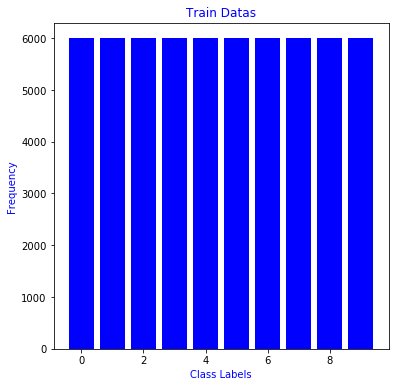

In [4]:
DataFreq = TrainLabels.value_counts()
x = [i for i in range(len(DataFreq))]

plt.figure(figsize = (6, 6)) 

plt.bar(x, DataFreq, color = 'blue')
plt.title("Train Datas", color = 'blue') 
plt.xlabel("Class Labels", color = 'blue') 
plt.ylabel("Frequency", color = 'blue')
plt.show() 

### For Test Data:

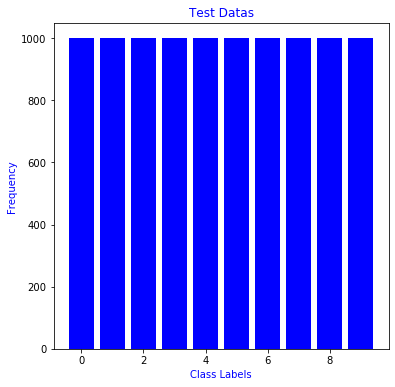

In [5]:
DataFreq = TestLabels.value_counts()
x = [i for i in range(len(DataFreq))]

plt.figure(figsize = (6, 6)) 

plt.bar(x, DataFreq, color = 'blue')
plt.title("Test Datas", color = 'blue') 
plt.xlabel("Class Labels", color = 'blue') 
plt.ylabel("Frequency", color = 'blue') 
plt.show() 

## Step 3:

### Normalization:
When we normalize the data, all the data is in the range between zero and one. This speeds up computations because it simplifies math operations. And will reduce overflow. It also reduces the chance of the gradient exploding. Also, if our weights are updated with smaller amounts, our model will be more stable.

In [6]:
def normalization(Data):
    return Data.apply(lambda val : val / 255) 

TrainData = normalization(TrainData)
TestData = normalization(TestData)

In [7]:
TrainData = TrainData.to_numpy()
TestData = TestData.to_numpy()
TrainLabels = TrainLabels.to_numpy()
TestLabels = TestLabels.to_numpy()

# Completing parts of the neural network

## Step 1: Dataloader

In [8]:
class Dataloader:
    
    def __init__(self, data, labels, n_classes, batch_size=None, shuffle=False):

        assert len(data)==len(labels)
        self.__n_classes = n_classes
        self.__batch_size = batch_size
        self.__shuffle = shuffle
        self.__data = data
        self.__onehot_labels = self.__onehot(labels, self.__n_classes)
    
    def __onehot(self, labels, n_classes):
        onehot_vectors = np.eye(n_classes)[labels]
        onehot_vectors = np.asmatrix(onehot_vectors)
        return onehot_vectors
    
    def __shuffle_dataset(self):
        shuffler = np.random.permutation(len(self.__data))
        self.__data = self.__data[shuffler]
        self.__onehot_labels = self.__onehot_labels[shuffler]
    
    def __iter__(self):
        
        if self.__shuffle:
            self.__shuffle_dataset()
            
        if self.__batch_size==None:
            yield (np.matrix(self.__data), np.matrix(self.__onehot_labels))
            return
            
        for idx in range(0, len(self.__data), self.__batch_size):
            yield (np.matrix(self.__data[idx:idx+self.__batch_size]), 
                   np.matrix(self.__onehot_labels[idx:idx+self.__batch_size]))

## Step 2: Activation Function

In [22]:
class Identical:
    
    def __init__(self): pass
    
    def __val(self, matrix):
        identical_value = np.matrix(matrix, dtype=float)
        return identical_value

    def derivative(self, matrix):
        temp = np.matrix(matrix, dtype=float)
        identical_derivative = np.matrix(np.full(np.shape(temp), 1.))
        return identical_derivative
    
    def __call__(self, matrix):
        return self.__val(matrix)
    

class Relu:
    
    def __init__(self): pass
    
    def __relu(self, matrix):
        matrix = np.matrix(matrix, dtype=float)
        matrix[matrix < 0] = 0
        relu_value = matrix
        return relu_value

    def derivative(self, matrix):
        matrix = np.matrix(matrix, dtype=float)
        matrix[matrix <= 0] = 0 
        matrix[matrix > 0] = 1
        relu_derivative = matrix
        return relu_derivative
    
    def __call__(self, matrix):
        return self.__relu(matrix)

    
class LeakyRelu:
    
    def __init__(self, negative_slope=0.01):
        self.negative_slope = 0.01
    
    def __val(self, matrix):
        matrix = np.matrix(matrix, dtype=float)
        matrix = np.where(matrix > 0, matrix, matrix*self.negative_slope)
        leacky_relu_value = matrix
        return leacky_relu_value

    def derivative(self, matrix):
        matrix = np.matrix(matrix, dtype=float)
        matrix[matrix > 0] = 1
        matrix[matrix <= 0] = self.negative_slope
        leacky_relu_derivative = matrix
        return leacky_relu_derivative
    
    def __call__(self, matrix):
        return self.__val(matrix)

    
class Sigmoid:
    
    def __init__(self): pass

    def __val(self, matrix):
        exp = np.exp(matrix)
        value = 1 / (1 + (1 / exp))
        sigmoid_value = np.matrix(value, dtype=float)
        return sigmoid_value

    def derivative(self, matrix):
        exp = np.exp(matrix)
        value = 1 / (1 + (1 / exp))
        der_value = np.multiply(value, (1 - value))
        sigmoid_derivative = np.matrix(der_value, dtype=float)
        return sigmoid_derivative
    
    def __call__(self, matrix):
        return self.__val(matrix)


class Softmax:
    
    def __init__(self): pass

    def __val(self, matrix):
        a = matrix - matrix.max(1)
        b = np.exp(a)
        c = np.sum(b, axis=1)
        value = b / c
        softmax_value = np.matrix(value, dtype=float)
        return softmax_value
    
    def __call__(self, matrix):
        return self.__val(matrix)
    
class Tanh:
    
    def __init__(self): pass

    def __val(self, matrix):
        matrix = np.matrix(matrix, dtype=float)
        tanh_value = np.tanh(matrix)
        return tanh_value

    def derivative(self, matrix):
        matrix = np.matrix(matrix, dtype=float)
        tanh_value = np.tanh(matrix)
        tanh_derivative = 1 - np.multiply(tanh_value, tanh_value)
        return tanh_derivative
    
    def __call__(self, matrix):
        return self.__val(matrix)

## Loss function

In [10]:
class CrossEntropy: #(with softmax)
    
    def __init__(self): pass

    def __val(self, true_val, expected_val):
        assert np.shape(true_val)==np.shape(expected_val)
        new_true_val = Softmax()(true_val)
        temp = -1 * np.multiply(expected_val, np.ma.log(new_true_val))
        cross_entropy_value = np.sum(temp, axis = 1)
        return cross_entropy_value
        
    def derivative(self, true_val, expected_val):
        assert np.shape(true_val)==np.shape(expected_val)
        new_true_val = softmax = Softmax()(true_val)
        cross_entropy_derivative = new_true_val - expected_val
        return cross_entropy_derivative
    
    def __call__(self, true_val, expected_val):
        return self.__val(true_val, expected_val)

## Layer

In [11]:
class Layer:

    DEFAULT_LOW, DEFAULT_HIGH, DEFAULT_MEAN, DEFAULT_VAR = 0, 0.05, 0., 1.
  
    def __init__(self, input_size, output_size, 
                 activation=Identical(), initial_weight='uniform', **initializing_parameters):
        
        assert type(initial_weight)==str, 'Undefined activation function!'
        
        self.__weight_initializer_dict = {'uniform':self.__uniform_weight, 'normal':self.__normal_weight}

        assert initial_weight in self.__weight_initializer_dict, 'Undefined weight initialization function!'
        
        
        self.__n_neurons = output_size
        weight_initializer = self.__weight_initializer_dict[initial_weight]
        self.__weight = weight_initializer(input_size, self.__n_neurons, **initializing_parameters)
        self.__bias = weight_initializer(1, self.__n_neurons, **initializing_parameters)
        self.__activation = activation
        
        self.__last_input = None
        self.__last_activation_input = None
        self.__last_activation_output = None
        self.__last_activation_derivative = None
        
    def forward(self, layer_input):
        assert np.ndim(layer_input)==2
        assert np.size(self.__weight,0) == np.size(layer_input,1)
        self.__last_input = layer_input
        self.__last_activation_input = np.matmul(self.__last_input, self.__weight) + self.__bias
        self.__last_activation_output = self.__activation( self.__last_activation_input)
        self.__last_activation_derivative = self.__activation.derivative(self.__last_activation_input)
        return self.__last_activation_output
    
    def update_weights(self, backprop_tensor, lr):
        assert np.ndim(backprop_tensor)==2
        assert np.size(backprop_tensor,0) == np.size(self.__last_activation_derivative,0)
        assert np.size(backprop_tensor,1) == self.__n_neurons
        
        pre_weight = self.__weight
        
        dl_dy = np.multiply(backprop_tensor, self.__last_activation_derivative)
        
        dl_dw = np.matmul(np.transpose(self.__last_input), dl_dy)
        self.__weight = self.__weight - (lr * dl_dw)
        
        array = np.matrix(np.ones(dl_dy.shape[0]))
        dl_dw = np.matmul(array, dl_dy)
        self.__bias -= lr * dl_dw
        
        backprop_tensor = np.matmul(dl_dy, np.transpose(pre_weight))
        
        return backprop_tensor

    def __uniform_weight(self, dim1, dim2, **initializing_parameters):
        low, high = self.DEFAULT_LOW, self.DEFAULT_HIGH
        if 'low' in initializing_parameters.keys(): low = initializing_parameters['low']
        if 'high' in initializing_parameters.keys(): high = initializing_parameters['high']
        weights = np.random.uniform(low, high, (dim1, dim2))
        return weights

    def __normal_weight(self, dim1, dim2, **initializing_parameters):
        mean, var = self.DEFAULT_MEAN, self.DEFAULT_VAR
        if 'mean' in initializing_parameters.keys(): mean = initializing_parameters['mean']
        if 'var' in initializing_parameters.keys(): var = initializing_parameters['var']
        weights = np.random.normal(mean, np.sqrt(var), (dim1, dim2))
        return weights
    
    @property
    def n_neurons(self): return self.__n_neurons
    
    @property
    def weight(self): return self.__weight
    
    @property
    def bias(self): return self.__bias
    
    @property
    def activation(self): return self.__activation

## Feed Forward NN

In [12]:
class FeedForwardNN:
    
    def __init__(self, input_shape):
        
        self.__input_shape = input_shape
        self.__output_shape = None
        
        self.__layers_list = []
        
        self.__lr = None
        self.__loss = None
        
        self.train_result = list()
        self.test_result = list()
        self.train_labels_result = list()
        self.test_labels_result = list()
        self.train_flag = False
        self.test_flag = False

        
    def add_layer(self, n_neurons, activation=Relu(), initial_weight='uniform', **initializing_parameters):
         
        assert type(n_neurons)==int, "Invalid number of neurons for the layer!"
        assert n_neurons>0, "Invalid number of neurons for the layer!"
        
        n_prev_neurons = self.__input_shape if len(self.__layers_list)==0 else self.__layers_list[-1].n_neurons
        new_layer = Layer(n_prev_neurons, n_neurons, activation, initial_weight, **initializing_parameters)
        self.__layers_list.append(new_layer)
        self.__output_shape = self.__layers_list[-1].n_neurons 
          
    
    def set_training_param(self, loss=CrossEntropy(), lr=1e-3):
        assert self.__layers_list, "Uncomplete model!"
        self.__loss = loss
        self.__lr = lr
    
    
    def forward(self, network_input, label=None, last_epoch=None):
        assert type(self.__output_shape) != None, "Model is not compiled!"
        
        for layer in self.__layers_list:
            network_input = layer.forward(network_input)
            
            if layer == self.__layers_list[len(self.__layers_list)-2] and last_epoch == True:

                if self.train_flag == True:
                    self.train_result.append(network_input)
                    self.train_labels_result.append(label)
                    
                if self.test_flag == True:
                    self.test_result.append(network_input)
                    self.test_labels_result.append(label)
                    
        network_output = network_input
        return network_output
    
    
    def fit(self, epochs, trainloader, testloader=None, print_results=True):
        
        assert type(self.__output_shape) != None, "Model is not compiled!"
        assert type(self.__lr) != None and type(self.__loss) != None, "Training paramenters are not set!"

        log = {"train_accuracy":[], "train_loss":[], "test_accuracy":[], "test_loss":[]}
        
        last_epoch = False
        
        for epoch in range(1, epochs+1):
            
            if print_results: 
                print('Epoch {}:'.format(epoch)) 
                
            if epoch == epochs:
                last_epoch = True
                
            average_accuracy, average_loss = self.__train(trainloader, last_epoch)
            log['train_accuracy'].append(average_accuracy)
            log['train_loss'].append(average_loss)
            if print_results:
                print('\tTrain: Average Accuracy: {}\tAverage Loss: {}'.format(average_accuracy, average_loss))
            
            if type(testloader) != type(None):
                average_accuracy, average_loss = self.__test(testloader, last_epoch)
                log['test_accuracy'].append(average_accuracy)
                log['test_loss'].append(average_loss)
                if print_results:
                    print('\tTest: Average Accuracy: {}\tAverage Loss: {}'.format(average_accuracy, average_loss))
                    
        return log
    
    
    def __train(self, trainloader, last_epoch=None):
        bach_accuracies, batch_losses = [], []
        for x_train, y_train in trainloader:
            batch_accuracy, batch_loss = self.__train_on_batch(x_train, y_train, last_epoch)
            bach_accuracies.append(batch_accuracy)
            batch_losses.append(batch_loss)
        return np.mean(bach_accuracies), np.mean(batch_losses)
    
    
    def __test(self, testloader, last_epoch=None):
        bach_accuracies, batch_losses = [], []
        for x_test, y_test in testloader:
            batch_accuracy, batch_loss = self.__test_on_batch(x_test, y_test, last_epoch)
            bach_accuracies.append(batch_accuracy)
            batch_losses.append(batch_loss)
        return np.mean(bach_accuracies), np.mean(batch_losses)

    
    def __train_on_batch(self, x_batch, y_batch, last_epoch=None):
        self.set_train_and_test_flag("train")
        
        f = self.forward(x_batch, y_batch, last_epoch)
        
        batch_accuracy = self.__compute_accuracy(f, y_batch)
        
        e = self.__loss(f, y_batch)
        batch_average_loss = np.sum(e) / len(e)
        
        self.__update_weights(f, y_batch)

        return (batch_accuracy, batch_average_loss)
        
        
    def __test_on_batch(self, x_batch, y_batch, last_epoch=None):
        self.set_train_and_test_flag("test")
        f = self.forward(x_batch, y_batch, last_epoch)
        
        batch_accuracy = self.__compute_accuracy(f, y_batch)
        
        e = self.__loss(f, y_batch)
        batch_average_loss = np.sum(e) / len(e)

        return (batch_accuracy, batch_average_loss)
            
        
    def __get_labels(self, outputs):
        labels = np.argmax(outputs, axis = 1)
        return labels
    
    
    def __compute_accuracy(self, output, expected_output):
        size = len(output)
        accuracy = (np.sum(self.__get_labels(output) == self.__get_labels(expected_output)) / size) * 100
        return accuracy
    
    
    def __update_weights(self, output, y_train):
        loss_der = self.__loss.derivative(output, y_train)
        for layer in reversed(self.__layers_list):
            loss_der = layer.update_weights(loss_der, self.__lr)
        return
    
    def get_result_lists(self):
        return self.train_result, self.test_result, self.train_labels_result, self.test_labels_result
    
    def set_train_and_test_flag(self, status):
        if status == "train":
            self.train_flag = True
            self.test_flag = False
        elif status == "test":
            self.test_flag = True
            self.train_flag = False

### Step 1:

## Training Sample Code
Sample code for building and training a model

In [13]:
# Sample code for building and training a model

INPUT_SHAPE = 784
LEARNING_RATE = 0.001
EPOCHS = 30
TRAINLOADER = list()
TESTLOADER = list()

for i in Dataloader(TrainData, TrainLabels, 10, batch_size=32, shuffle=True):
    TRAINLOADER.append(i)

for i in  Dataloader(TestData, TestLabels, 10, batch_size=32, shuffle=True):
    TESTLOADER.append(i)
    
network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(20, input_shape=INPUT_SHAPE, activation=Relu(), weight_initializer='normal')
network.add_layer(15, activation=Relu(), weight_initializer='normal')
network.add_layer(10, activation=Identical(), weight_initializer='normal')
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Epoch 1:
	Train: Average Accuracy: 45.10166666666667	Average Loss: 1.4257307405874495
	Test: Average Accuracy: 69.24920127795527	Average Loss: 0.8602107188133471
Epoch 2:
	Train: Average Accuracy: 73.77166666666666	Average Loss: 0.7320006358998791
	Test: Average Accuracy: 78.58426517571885	Average Loss: 0.6117098086669467
Epoch 3:
	Train: Average Accuracy: 80.03166666666667	Average Loss: 0.5653790065223858
	Test: Average Accuracy: 81.39976038338658	Average Loss: 0.5318806638791129
Epoch 4:
	Train: Average Accuracy: 82.38	Average Loss: 0.5010090814813021
	Test: Average Accuracy: 82.74760383386581	Average Loss: 0.48931584978311804
Epoch 5:
	Train: Average Accuracy: 83.56666666666666	Average Loss: 0.46507930714565043
	Test: Average Accuracy: 83.55630990415335	Average Loss: 0.47324819334993573
Epoch 6:
	Train: Average Accuracy: 84.44333333333333	Average Loss: 0.439275789963751
	Test: Average Accuracy: 84.13538338658147	Average Loss: 0.4545917452189018
Epoch 7:
	Train: Average Accuracy: 85.

### Step 2:

### Learning Rate:

The higher the effective value of the training speed, the faster and more our weight changes, and this will make our model invisible. And the slower this learning speed is, the slower and smaller the weight will be, and we may be stuck with a certain accuracy and not be updated.

## * 10

In [23]:
# Sample code for building and training a model

INPUT_SHAPE = 784
LEARNING_RATE = 0.01
EPOCHS = 30
TRAINLOADER = list()
TESTLOADER = list()

for i in Dataloader(TrainData, TrainLabels, 10, batch_size=32, shuffle=True):
    TRAINLOADER.append(i)

for i in  Dataloader(TestData, TestLabels, 10, batch_size=32, shuffle=True):
    TESTLOADER.append(i)
    
network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(20, input_shape=INPUT_SHAPE, activation=Relu(), weight_initializer='normal')
network.add_layer(15, activation=Relu(), weight_initializer='normal')
network.add_layer(10, activation=Identical(), weight_initializer='normal')
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Epoch 1:
	Train: Average Accuracy: 10.053333333333333	Average Loss: 2.3066202563374207
	Test: Average Accuracy: 9.994009584664537	Average Loss: 2.305152873931763
Epoch 2:
	Train: Average Accuracy: 10.035	Average Loss: 2.304938063979278
	Test: Average Accuracy: 9.994009584664537	Average Loss: 2.305152873931763
Epoch 3:
	Train: Average Accuracy: 10.035	Average Loss: 2.304938063979278
	Test: Average Accuracy: 9.994009584664537	Average Loss: 2.305152873931763
Epoch 4:
	Train: Average Accuracy: 10.035	Average Loss: 2.304938063979278
	Test: Average Accuracy: 9.994009584664537	Average Loss: 2.305152873931763
Epoch 5:
	Train: Average Accuracy: 10.035	Average Loss: 2.304938063979278
	Test: Average Accuracy: 9.994009584664537	Average Loss: 2.305152873931763
Epoch 6:
	Train: Average Accuracy: 10.035	Average Loss: 2.304938063979278
	Test: Average Accuracy: 9.994009584664537	Average Loss: 2.305152873931763
Epoch 7:
	Train: Average Accuracy: 10.035	Average Loss: 2.304938063979278
	Test: Average Accu

## / 10

In [24]:
# Sample code for building and training a model

INPUT_SHAPE = 784
LEARNING_RATE = 0.0001
EPOCHS = 30
TRAINLOADER = list()
TESTLOADER = list()

for i in Dataloader(TrainData, TrainLabels, 10, batch_size=32, shuffle=True):
    TRAINLOADER.append(i)

for i in  Dataloader(TestData, TestLabels, 10, batch_size=32, shuffle=True):
    TESTLOADER.append(i)
    
network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(20, input_shape=INPUT_SHAPE, activation=Relu(), weight_initializer='normal')
network.add_layer(15, activation=Relu(), weight_initializer='normal')
network.add_layer(10, activation=Identical(), weight_initializer='normal')
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Epoch 1:
	Train: Average Accuracy: 10.256666666666666	Average Loss: 2.2491433513102916
	Test: Average Accuracy: 10.573083067092652	Average Loss: 2.228505641566294
Epoch 2:
	Train: Average Accuracy: 13.241666666666667	Average Loss: 2.208557992380972
	Test: Average Accuracy: 15.784744408945686	Average Loss: 2.1836915608711394
Epoch 3:
	Train: Average Accuracy: 25.753333333333334	Average Loss: 2.039915703765645
	Test: Average Accuracy: 43.700079872204476	Average Loss: 1.6074423819692865
Epoch 4:
	Train: Average Accuracy: 49.39833333333333	Average Loss: 1.301930841431475
	Test: Average Accuracy: 55.021964856230035	Average Loss: 1.154249885189964
Epoch 5:
	Train: Average Accuracy: 55.66	Average Loss: 1.0984263315127696
	Test: Average Accuracy: 58.33666134185304	Average Loss: 1.0522987082025337
Epoch 6:
	Train: Average Accuracy: 59.03333333333333	Average Loss: 1.0209425664037552
	Test: Average Accuracy: 62.3202875399361	Average Loss: 0.983445429035008
Epoch 7:
	Train: Average Accuracy: 63.72

### Step 3:

The highest accuracy belongs to Rickley Rello and then Rello, followed by the accuracy of Tangent and Sigmoid. Ricky Rilo is better than Rilo because it does not zero negative numbers and equals one. In this way, its derivative does not suddenly become zero to stop the learning process.
In big data, the activation derivative of the sigmoid and tangent functions is close to zero. This function causes the weight to be updated less quickly and even gets stuck in a certain accuracy from now on and is no longer updated.

### LeakyRelu

In [25]:
# Sample code for building and training a model

INPUT_SHAPE = 784
LEARNING_RATE = 0.001
EPOCHS = 30
TRAINLOADER = list()
TESTLOADER = list()

for i in Dataloader(TrainData, TrainLabels, 10, batch_size=32, shuffle=True):
    TRAINLOADER.append(i)

for i in  Dataloader(TestData, TestLabels, 10, batch_size=32, shuffle=True):
    TESTLOADER.append(i)
    
network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(20, input_shape=INPUT_SHAPE, activation=LeakyRelu(), weight_initializer='uniform')
network.add_layer(15, activation=LeakyRelu(), weight_initializer='uniform')
network.add_layer(10, activation=Identical(), weight_initializer='uniform')
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Epoch 1:
	Train: Average Accuracy: 45.26	Average Loss: 1.4083113290171498
	Test: Average Accuracy: 69.59864217252397	Average Loss: 0.8372212095142081
Epoch 2:
	Train: Average Accuracy: 73.535	Average Loss: 0.7286430322634391
	Test: Average Accuracy: 77.62579872204473	Average Loss: 0.6329504951794326
Epoch 3:
	Train: Average Accuracy: 79.41166666666666	Average Loss: 0.5794267492393066
	Test: Average Accuracy: 80.15175718849841	Average Loss: 0.562845235638082
Epoch 4:
	Train: Average Accuracy: 81.74166666666666	Average Loss: 0.5171617952594599
	Test: Average Accuracy: 81.54952076677316	Average Loss: 0.5251510835989305
Epoch 5:
	Train: Average Accuracy: 83.18666666666667	Average Loss: 0.474016019358739
	Test: Average Accuracy: 81.92891373801918	Average Loss: 0.49850135626856096
Epoch 6:
	Train: Average Accuracy: 84.18833333333333	Average Loss: 0.44658388785458747
	Test: Average Accuracy: 82.5379392971246	Average Loss: 0.48030248013240145
Epoch 7:
	Train: Average Accuracy: 84.8433333333333

### Sigmoid

In [40]:
# Sample code for building and training a model

INPUT_SHAPE = 784
LEARNING_RATE = 0.001
EPOCHS = 30
TRAINLOADER = list()
TESTLOADER = list()

for i in Dataloader(TrainData, TrainLabels, 10, batch_size=32, shuffle=True):
    TRAINLOADER.append(i)

for i in  Dataloader(TestData, TestLabels, 10, batch_size=32, shuffle=True):
    TESTLOADER.append(i)
    
network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(20, input_shape=INPUT_SHAPE, activation=Sigmoid(), weight_initializer='uniform')
network.add_layer(15, activation=Sigmoid(), weight_initializer='uniform')
network.add_layer(10, activation=Identical(), weight_initializer='uniform')
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Epoch 1:
	Train: Average Accuracy: 9.931666666666667	Average Loss: 2.304084381158483
	Test: Average Accuracy: 9.994009584664537	Average Loss: 2.304055117209687
Epoch 2:
	Train: Average Accuracy: 9.955	Average Loss: 2.3039262867087476
	Test: Average Accuracy: 9.994009584664537	Average Loss: 2.30389834260106
Epoch 3:
	Train: Average Accuracy: 9.981666666666667	Average Loss: 2.303755755803249
	Test: Average Accuracy: 9.994009584664537	Average Loss: 2.303718807993937
Epoch 4:
	Train: Average Accuracy: 10.073333333333334	Average Loss: 2.303525683863326
	Test: Average Accuracy: 9.994009584664537	Average Loss: 2.3034264095364247
Epoch 5:
	Train: Average Accuracy: 10.168333333333333	Average Loss: 2.3030899309917516
	Test: Average Accuracy: 9.994009584664537	Average Loss: 2.3028036989383134
Epoch 6:
	Train: Average Accuracy: 10.608333333333333	Average Loss: 2.3020839108266964
	Test: Average Accuracy: 9.994009584664537	Average Loss: 2.3012854146408466
Epoch 7:
	Train: Average Accuracy: 11.72	Ave

### Tanh

In [31]:
# Sample code for building and training a model

INPUT_SHAPE = 784
LEARNING_RATE = 0.001
EPOCHS = 30
TRAINLOADER = list()
TESTLOADER = list()

for i in Dataloader(TrainData, TrainLabels, 10, batch_size=32, shuffle=True):
    TRAINLOADER.append(i)

for i in  Dataloader(TestData, TestLabels, 10, batch_size=32, shuffle=True):
    TESTLOADER.append(i)
    
network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(20, input_shape=INPUT_SHAPE, activation=Tanh(), weight_initializer='uniform')
network.add_layer(15, activation=Tanh(), weight_initializer='uniform')
network.add_layer(10, activation=Identical(), weight_initializer='uniform')
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Epoch 1:
	Train: Average Accuracy: 10.0	Average Loss: 2.3031474173514552
	Test: Average Accuracy: 12.420127795527156	Average Loss: 2.3022299953220466
Epoch 2:
	Train: Average Accuracy: 10.353333333333333	Average Loss: 2.3023220759096517
	Test: Average Accuracy: 14.406948881789138	Average Loss: 2.3015512805973346
Epoch 3:
	Train: Average Accuracy: 11.365	Average Loss: 2.300534734727737
	Test: Average Accuracy: 17.37220447284345	Average Loss: 2.2895058281023144
Epoch 4:
	Train: Average Accuracy: 26.596666666666668	Average Loss: 1.677003371725027
	Test: Average Accuracy: 29.52276357827476	Average Loss: 1.4653767617818116
Epoch 5:
	Train: Average Accuracy: 41.60333333333333	Average Loss: 1.3119254221500969
	Test: Average Accuracy: 55.081869009584665	Average Loss: 1.0947951246044565
Epoch 6:
	Train: Average Accuracy: 58.695	Average Loss: 1.0284084013897603
	Test: Average Accuracy: 67.24241214057508	Average Loss: 0.9257118490943029
Epoch 7:
	Train: Average Accuracy: 69.435	Average Loss: 0.83

### Step 4:

The larger the batch size, the faster the training, and because the larger the batch members, the better the accuracy, and the training speed of each ipak should increase, and if the batch size is small, the probability of random behaviors of the model It raises higher. And that we have limited memory and need to process data in batches.

### Batch size = 16

In [49]:
# Sample code for building and training a model

INPUT_SHAPE = 784
LEARNING_RATE = 0.001
EPOCHS = 30
TRAINLOADER = list()
TESTLOADER = list()

for i in Dataloader(TrainData, TrainLabels, 10, batch_size=16, shuffle=True):
    TRAINLOADER.append(i)

for i in  Dataloader(TestData, TestLabels, 10, batch_size=16, shuffle=True):
    TESTLOADER.append(i)
    
network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(20, input_shape=INPUT_SHAPE, activation=LeakyRelu(), weight_initializer='uniform')
network.add_layer(15, activation=LeakyRelu(), weight_initializer='uniform')
network.add_layer(10, activation=Identical(), weight_initializer='uniform')
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Epoch 1:
	Train: Average Accuracy: 45.40833333333333	Average Loss: 1.4165820762155883
	Test: Average Accuracy: 69.39	Average Loss: 0.8582662169777501
Epoch 2:
	Train: Average Accuracy: 72.65333333333334	Average Loss: 0.7458903198467627
	Test: Average Accuracy: 74.51	Average Loss: 0.6901028915105711
Epoch 3:
	Train: Average Accuracy: 78.20666666666666	Average Loss: 0.6152309575627583
	Test: Average Accuracy: 78.22	Average Loss: 0.6038284040643559
Epoch 4:
	Train: Average Accuracy: 81.13	Average Loss: 0.5382042579294137
	Test: Average Accuracy: 81.31	Average Loss: 0.5349306983872449
Epoch 5:
	Train: Average Accuracy: 82.75333333333333	Average Loss: 0.4872620752990058
	Test: Average Accuracy: 82.62	Average Loss: 0.49970747701209167
Epoch 6:
	Train: Average Accuracy: 83.925	Average Loss: 0.4521014374296781
	Test: Average Accuracy: 83.24	Average Loss: 0.47761080379060766
Epoch 7:
	Train: Average Accuracy: 84.86666666666666	Average Loss: 0.42571163103691295
	Test: Average Accuracy: 83.89	Ave

### Batch size = 128

In [50]:
# Sample code for building and training a model

INPUT_SHAPE = 784
LEARNING_RATE = 0.001
EPOCHS = 30
TRAINLOADER = list()
TESTLOADER = list()

for i in Dataloader(TrainData, TrainLabels, 10, batch_size=128, shuffle=True):
    TRAINLOADER.append(i)

for i in  Dataloader(TestData, TestLabels, 10, batch_size=128, shuffle=True):
    TESTLOADER.append(i)
    
network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(20, input_shape=INPUT_SHAPE, activation=LeakyRelu(), weight_initializer='uniform')
network.add_layer(15, activation=LeakyRelu(), weight_initializer='uniform')
network.add_layer(10, activation=Identical(), weight_initializer='uniform')
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Epoch 1:
	Train: Average Accuracy: 41.43512348969439	Average Loss: 1.5176849865268491
	Test: Average Accuracy: 67.82041139240506	Average Loss: 0.8418811825374926
Epoch 2:
	Train: Average Accuracy: 72.64236851457001	Average Loss: 0.7365787383636064
	Test: Average Accuracy: 77.1064082278481	Average Loss: 0.6165388384590812
Epoch 3:
	Train: Average Accuracy: 79.58255597014926	Average Loss: 0.580307065336358
	Test: Average Accuracy: 80.37974683544304	Average Loss: 0.5448868603952141
Epoch 4:
	Train: Average Accuracy: 82.00959488272922	Average Loss: 0.5124450799817457
	Test: Average Accuracy: 82.02136075949367	Average Loss: 0.5103233076679076
Epoch 5:
	Train: Average Accuracy: 83.35054637526652	Average Loss: 0.46701132688304375
	Test: Average Accuracy: 82.7432753164557	Average Loss: 0.4780579326721673
Epoch 6:
	Train: Average Accuracy: 84.37666577825159	Average Loss: 0.43486815567309894
	Test: Average Accuracy: 83.98931962025317	Average Loss: 0.44410977735671475
Epoch 7:
	Train: Average Acc

### Step 5:

Because from somewhere onwards, the amount of error increases and the accuracy of the training data increases and the accuracy of the test data decreases. For this reason, we need not continue the training operation from somewhere.

In [90]:
# Sample code for building and training a model

INPUT_SHAPE = 784
LEARNING_RATE = 0.001
EPOCHS = 200
TRAINLOADER = list()
TESTLOADER = list()

for i in Dataloader(TrainData, TrainLabels, 10, batch_size=32, shuffle=True):
    TRAINLOADER.append(i)

for i in  Dataloader(TestData, TestLabels, 10, batch_size=32, shuffle=True):
    TESTLOADER.append(i)
    
network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(20, input_shape=INPUT_SHAPE, activation=LeakyRelu(), weight_initializer='uniform')
network.add_layer(15, activation=LeakyRelu(), weight_initializer='uniform')
network.add_layer(10, activation=Identical(), weight_initializer='uniform')
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Epoch 1:
	Train: Average Accuracy: 43.125	Average Loss: 1.4615298148825955
	Test: Average Accuracy: 67.05271565495208	Average Loss: 0.8612491833989777
Epoch 2:
	Train: Average Accuracy: 72.95333333333333	Average Loss: 0.7421128005575367
	Test: Average Accuracy: 77.79552715654953	Average Loss: 0.6266716321950241
Epoch 3:
	Train: Average Accuracy: 78.88333333333334	Average Loss: 0.600201215284747
	Test: Average Accuracy: 80.12180511182109	Average Loss: 0.5704805847664005
Epoch 4:
	Train: Average Accuracy: 81.01166666666667	Average Loss: 0.5370823859264113
	Test: Average Accuracy: 81.70926517571885	Average Loss: 0.5214812296885025
Epoch 5:
	Train: Average Accuracy: 82.55	Average Loss: 0.4874341221949109
	Test: Average Accuracy: 83.12699680511182	Average Loss: 0.4856159764805236
Epoch 6:
	Train: Average Accuracy: 83.85166666666667	Average Loss: 0.45244205439020707
	Test: Average Accuracy: 83.88578274760384	Average Loss: 0.46457395576598126
Epoch 7:
	Train: Average Accuracy: 84.711666666666

	Test: Average Accuracy: 86.49161341853035	Average Loss: 0.4183262796474715
Epoch 53:
	Train: Average Accuracy: 90.865	Average Loss: 0.25293165242051036
	Test: Average Accuracy: 86.33186900958466	Average Loss: 0.42279003256118514
Epoch 54:
	Train: Average Accuracy: 90.92	Average Loss: 0.25162471286254645
	Test: Average Accuracy: 86.47164536741214	Average Loss: 0.4221202889881611
Epoch 55:
	Train: Average Accuracy: 90.99333333333334	Average Loss: 0.2510511175490408
	Test: Average Accuracy: 86.52156549520767	Average Loss: 0.4248367114030701
Epoch 56:
	Train: Average Accuracy: 90.97166666666666	Average Loss: 0.2500197542505738
	Test: Average Accuracy: 86.18210862619809	Average Loss: 0.42957486451687793
Epoch 57:
	Train: Average Accuracy: 90.96	Average Loss: 0.2491959453087461
	Test: Average Accuracy: 86.51158146964856	Average Loss: 0.4251227741368523
Epoch 58:
	Train: Average Accuracy: 91.02833333333334	Average Loss: 0.2481489476271004
	Test: Average Accuracy: 86.29193290734824	Average Lo

	Train: Average Accuracy: 92.06333333333333	Average Loss: 0.21890122385658173
	Test: Average Accuracy: 85.58306709265176	Average Loss: 0.511808029122717
Epoch 105:
	Train: Average Accuracy: 92.11666666666666	Average Loss: 0.21809288072632582
	Test: Average Accuracy: 85.45327476038338	Average Loss: 0.5163469952177299
Epoch 106:
	Train: Average Accuracy: 92.02666666666667	Average Loss: 0.2187564428375554
	Test: Average Accuracy: 85.43330670926518	Average Loss: 0.522039377638624
Epoch 107:
	Train: Average Accuracy: 92.13	Average Loss: 0.2169517088414787
	Test: Average Accuracy: 85.50319488817891	Average Loss: 0.5204817288217376
Epoch 108:
	Train: Average Accuracy: 92.09833333333333	Average Loss: 0.21837235303295335
	Test: Average Accuracy: 85.77276357827476	Average Loss: 0.5217111362294814
Epoch 109:
	Train: Average Accuracy: 92.11	Average Loss: 0.21723509720652845
	Test: Average Accuracy: 85.4832268370607	Average Loss: 0.5229361674929836
Epoch 110:
	Train: Average Accuracy: 92.1716666666

	Train: Average Accuracy: 92.535	Average Loss: 0.20626279294575034
	Test: Average Accuracy: 85.25359424920129	Average Loss: 0.5833522916588776
Epoch 156:
	Train: Average Accuracy: 92.64833333333333	Average Loss: 0.20364628839346696
	Test: Average Accuracy: 85.26357827476038	Average Loss: 0.5918802319177788
Epoch 157:
	Train: Average Accuracy: 92.78166666666667	Average Loss: 0.19985344555071538
	Test: Average Accuracy: 85.2935303514377	Average Loss: 0.5899029411615658
Epoch 158:
	Train: Average Accuracy: 92.77666666666667	Average Loss: 0.2002236728357607
	Test: Average Accuracy: 85.46325878594249	Average Loss: 0.5951575524831136
Epoch 159:
	Train: Average Accuracy: 92.835	Average Loss: 0.19857243729661156
	Test: Average Accuracy: 85.46325878594249	Average Loss: 0.5905567551809728
Epoch 160:
	Train: Average Accuracy: 92.76166666666667	Average Loss: 0.20007678938676376
	Test: Average Accuracy: 85.52316293929712	Average Loss: 0.5942703117418129
Epoch 161:
	Train: Average Accuracy: 92.85	Av

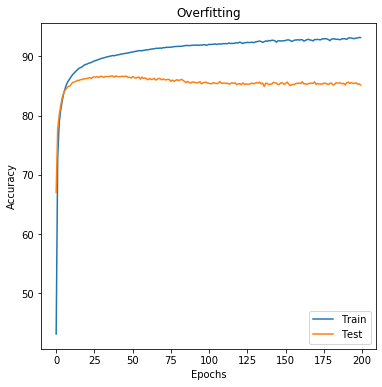

In [93]:
plt.figure(figsize = (6, 6)) 

plt.plot(log['train_accuracy'], label='Train')
plt.plot(log['test_accuracy'], label='Test')

plt.title("Overfitting")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.legend()
plt.show()

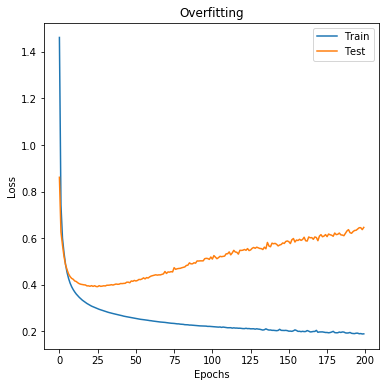

In [94]:
plt.figure(figsize = (6, 6)) 

plt.plot(log['train_loss'], label='Train')
plt.plot(log['test_loss'], label='Test')

plt.title("Overfitting")
plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.legend()
plt.show()

# Mapping data with reduced dimension

The network may not be able to distinguish between very similar data, such as shirts and T-shirts. This means that the more different the data, the easier it will be for the neural network to detect it. It generally depends on the implementation of the network.

In [95]:
# Sample code for building and training a model

INPUT_SHAPE = 784
LEARNING_RATE = 0.001
EPOCHS = 30
TRAINLOADER = list()
TESTLOADER = list()

for i in Dataloader(TrainData, TrainLabels, 10, batch_size=32, shuffle=False):
    TRAINLOADER.append(i)

for i in  Dataloader(TestData, TestLabels, 10, batch_size=32, shuffle=False):
    TESTLOADER.append(i)
    
network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(20, input_shape=INPUT_SHAPE, activation=LeakyRelu(), weight_initializer='uniform')
network.add_layer(10, activation=LeakyRelu(), weight_initializer='uniform')
network.add_layer(2, activation=LeakyRelu(), weight_initializer='uniform')
network.add_layer(10, activation=Identical(), weight_initializer='uniform')
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Epoch 1:
	Train: Average Accuracy: 21.883333333333333	Average Loss: 1.973888777781933
	Test: Average Accuracy: 32.7176517571885	Average Loss: 1.632864689877698
Epoch 2:
	Train: Average Accuracy: 39.79833333333333	Average Loss: 1.4391143726649864
	Test: Average Accuracy: 36.63138977635783	Average Loss: 1.6000470300927625
Epoch 3:
	Train: Average Accuracy: 53.01166666666666	Average Loss: 1.1591051313884815
	Test: Average Accuracy: 48.14297124600639	Average Loss: 1.2144419852651605
Epoch 4:
	Train: Average Accuracy: 62.87833333333333	Average Loss: 0.9682017602268294
	Test: Average Accuracy: 64.64656549520767	Average Loss: 0.9454192061274387
Epoch 5:
	Train: Average Accuracy: 68.96833333333333	Average Loss: 0.8222504488661178
	Test: Average Accuracy: 66.94289137380191	Average Loss: 0.8597081403370451
Epoch 6:
	Train: Average Accuracy: 72.15833333333333	Average Loss: 0.7420017044764674
	Test: Average Accuracy: 69.75838658146965	Average Loss: 0.8016696813449008
Epoch 7:
	Train: Average Accur

In [103]:
train_list, test_list, train_labels_list, test_labels_list = network.get_result_lists()
colors = sns.color_palette("rainbow", 10)

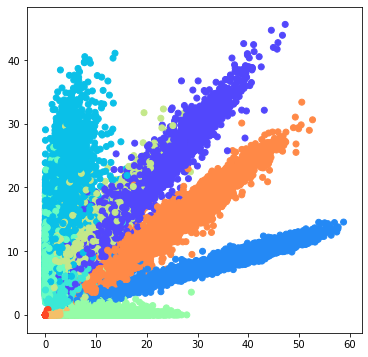

In [121]:
plt.figure(figsize=(6, 6))

counter = 0
for batch in train_list:
    x = np.array(batch[:, 0]).reshape(-1)
    y = np.array(batch[:, 1]).reshape(-1)
    c = np.array(train_labels_list[counter].argmax(1)).reshape(-1)
    plt.scatter(x,y, c=[colors[c[i]] for i in range(len(train_list[0]))])
    counter += 1

plt.show()

IndexError: index 16 is out of bounds for axis 0 with size 16

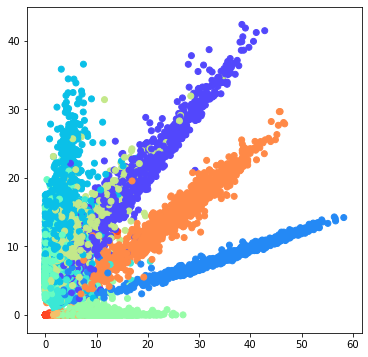

In [127]:
plt.figure(figsize=(6, 6))

counter = 0
for batch in test_list:
    x = np.array(batch[:, 0]).reshape(-1)
    y = np.array(batch[:, 1]).reshape(-1)
    c = np.array(test_labels_list[counter].argmax(1)).reshape(-1)
    plt.scatter(x,y, c=[colors[c[i]] for i in range(len(test_list[0]))])
    counter += 1

plt.show()